In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

`Regression problems are the problems where we try to make a prediction on a continuous scale.`


Regression Types :
    - Linear Regression
    - Multiple Linear Regression
    - Polynomial Regression
    - Decision Tree Regression
    - Random Forest Regression
    
https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

In [75]:
df = pd.read_csv('./data.csv/data.csv')

In [76]:
df.shape

(40455, 10)

In [77]:
df.isnull().sum().sum()

0

In [80]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170


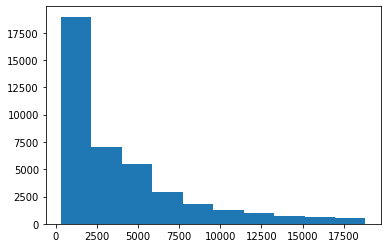

In [81]:
plt.hist(df.price)
plt.show()

In [82]:
print('Max Price: $',round(df.price.max(),2))
print('Min Price: $',round(df.price.min(),2))
print('Avg Price: $',round(df.price.mean(),2))
print('Med Price: $',round(df.price.median(),2))

Max Price: $ 18823
Min Price: $ 326
Avg Price: $ 3939.24
Med Price: $ 2409.0


In [83]:
bins = [0,400, 800, 1200, 1600, 2000, 3000, 5000, 7000, 10000,15000,20000]
df['bins'] = pd.cut(df['price'], bins)

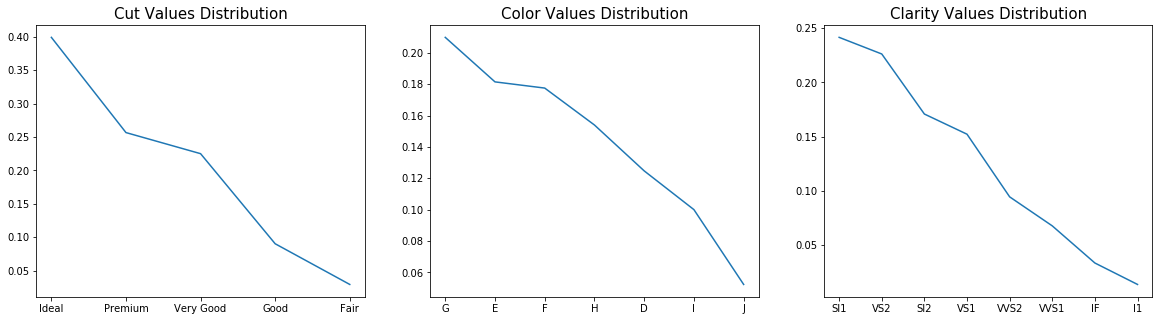

In [84]:
fig, ax = plt.subplots(1,3,figsize = (20,5))
ax[0].set_title('Cut Values Distribution',fontsize=15)
ax[0].plot(df.cut.value_counts(normalize=True))
ax[1].set_title('Color Values Distribution',fontsize=15)
ax[1].plot(df.color.value_counts(normalize=True))
ax[2].set_title('Clarity Values Distribution',fontsize=15)
ax[2].plot(df.clarity.value_counts(normalize=True))
plt.show()

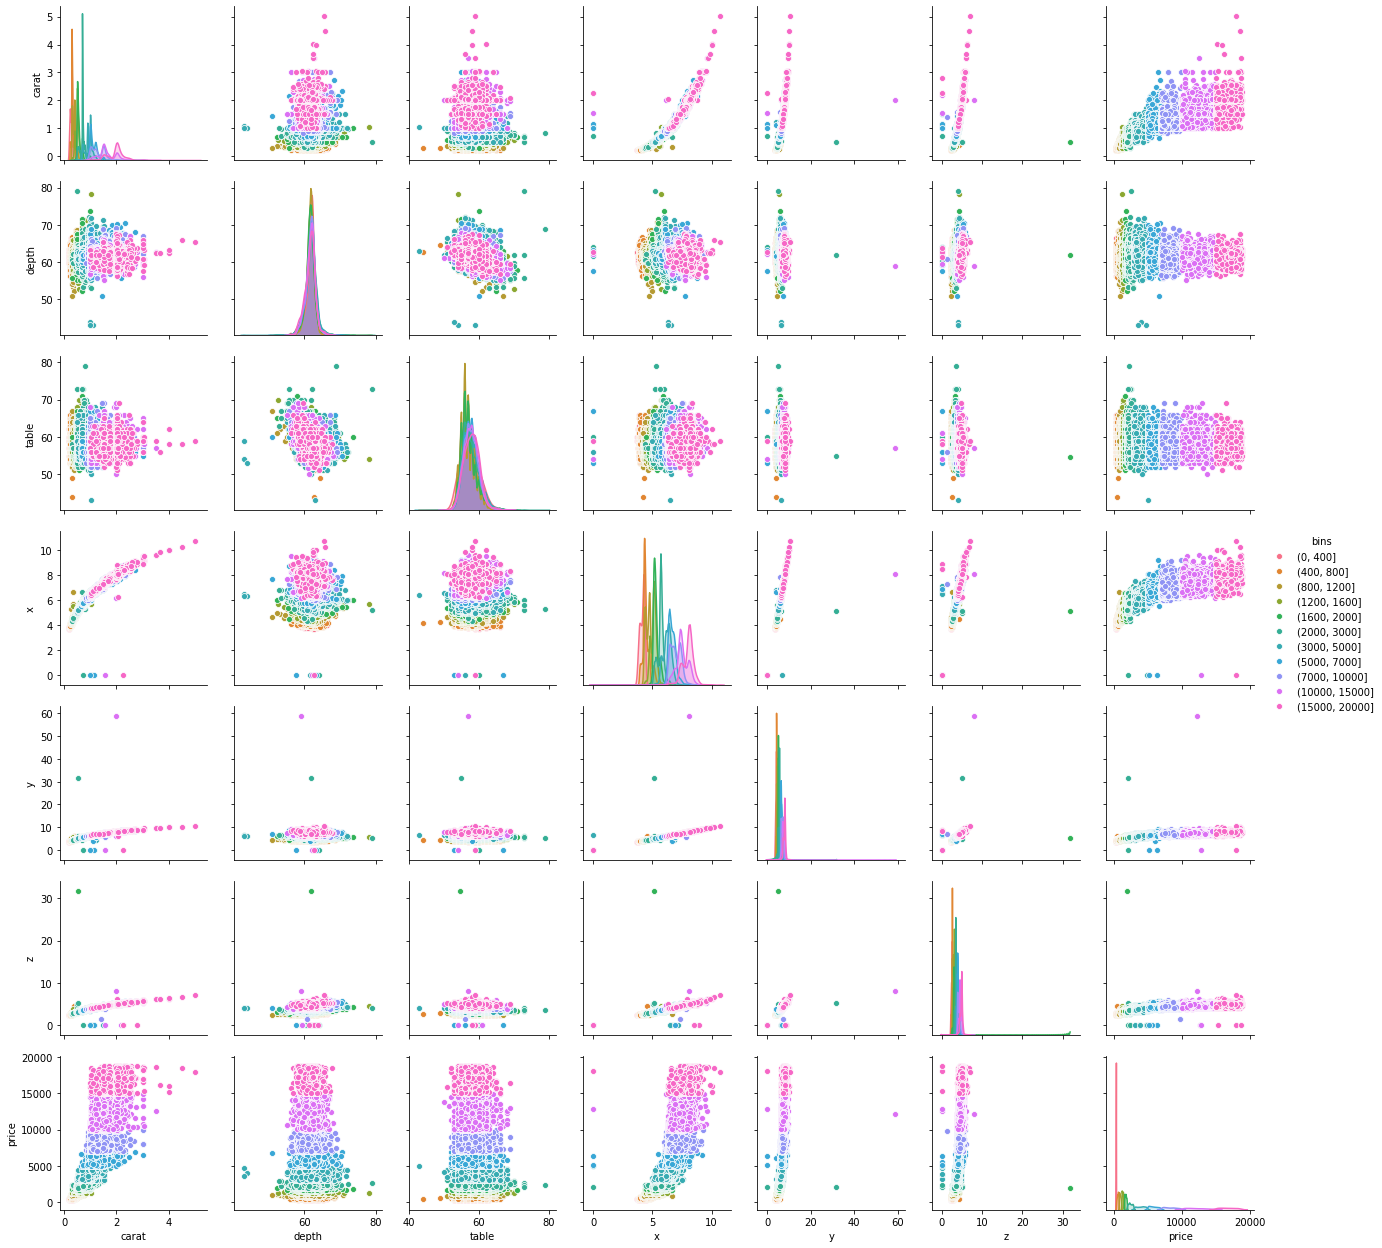

In [47]:
sns.pairplot(df, hue='bins')
plt.show()

### Categorical data

In [85]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
df = df.drop(['price/wt'], axis=1)

cut
Fair         3737.468421
Good         3873.241694
Ideal        3922.272721
Very Good    4011.693218
Premium      4223.619019
Name: price/wt, dtype: float64
color
E    3787.426635
J    3826.604761
D    3948.783704
I    4000.546520
H    4016.204136
F    4129.482925
G    4182.615921
Name: price/wt, dtype: float64
clarity
I1      2776.012219
SI1     3856.733909
VVS1    3860.279651
SI2     4015.902895
VS2     4080.272657
VS1     4143.406705
VVS2    4198.660097
IF      4276.867594
Name: price/wt, dtype: float64


In [86]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [87]:
df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price,bins
0,2.26,1,4,8,61.9,57.0,8.44,8.36,5.20,12831,"(10000, 15000]"
1,2.43,3,5,8,63.2,57.0,8.56,8.50,5.39,16170,"(15000, 20000]"
2,0.80,5,3,8,61.0,57.0,6.03,6.01,3.67,2797,"(2000, 3000]"


In [88]:
df.drop('bins', axis=1, inplace=True)

### Collinearity. Feature Selection

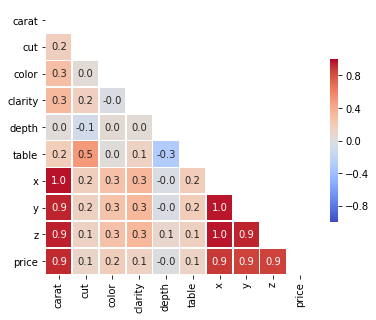

In [89]:
fig, ax = plt.subplots(figsize=(6,6))
filtro = ['carat','depth', 'table', 'x', 'y', 'z']
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# ax.set_ylim(20, 40)
sns.heatmap(df.corr(), cmap = 'coolwarm',mask=mask, annot=True,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},vmin=-1,fmt='.1f')

# print(ax.get_ylim())
plt.show()

In [90]:
vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
di = dict(zip(df.columns, vif))
di

{'carat': 119.6183130038345,
 'cut': 4.755696409280808,
 'color': 6.291634460375951,
 'clarity': 11.431956721716402,
 'depth': 570.4159991803864,
 'table': 610.0613182793476,
 'x': 1126.2796729812526,
 'y': 405.6058173899566,
 'z': 456.4498864079733,
 'price': 17.94302409362479}

In [91]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.164612,0.292045,0.321192,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
cut,0.164612,1.000000,0.042634,0.159496,-0.086914,0.497401,0.169130,0.150685,0.147062,0.111026
color,0.292045,0.042634,1.000000,-0.023945,0.048795,0.023432,0.271397,0.262300,0.267831,0.177511
clarity,0.321192,0.159496,-0.023945,1.000000,0.046587,0.144262,0.343605,0.329450,0.335807,0.147667
depth,0.024370,-0.086914,0.048795,0.046587,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,0.497401,0.023432,0.144262,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,0.169130,0.271397,0.343605,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,0.150685,0.262300,0.329450,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,0.147062,0.267831,0.335807,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,0.111026,0.177511,0.147667,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


In [92]:
df = df.drop(['table','depth'], axis=1)

## Train-test split

In [94]:
y = df['price']
X = df.drop('price', axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [96]:
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40455, 7) (40455,)
(32364, 7) (8091, 7) (32364,) (8091,)


## Modeling

In [109]:
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
models = {
        "ols": linear_model.LinearRegression(),
#         "logistic": LogisticRegression(random_state = 0),
        "gradient": GradientBoostingRegressor(max_depth=10,n_estimators=1000,learning_rate=1.0),
        "ridge":linear_model.Ridge(alpha=.1),
        "SVR": SVR(kernel='rbf'),
        "Decision_Tree":DecisionTreeRegressor(random_state = 0),
        "Random_Forest_reg":RandomForestRegressor(max_depth=13,min_samples_split=3,n_estimators=100,random_state=None,n_jobs =-1),
        "Random_Forest_clas":RandomForestClassifier(n_estimators = 6)  
}
for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)

Training model: ols
Training model: gradient
Training model: ridge
Training model: SVR
Training model: Decision_Tree
Training model: Random_Forest_reg
Training model: Random_Forest_clas


In [110]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(d)
df['gt'] = y_test.reset_index(drop=True)
df.sort_values(by= 'gt', ascending=False).head(10)

,ols,gradient,ridge,SVR,Decision_Tree,Random_Forest_reg,Random_Forest_clas,gt
1249,14204.796268,17157.800250,14203.761138,6333.755117,18186.0,17094.025773,16580,18818
1860,16114.161402,13059.375236,16113.023415,5850.960101,18119.0,17522.979218,14185,18797
3946,14518.662003,16760.040765,14517.807994,5897.012840,18193.0,17003.073273,17916,18779
3801,16730.042905,15004.347153,16728.840303,5846.944211,13027.0,15666.819585,15248,18745
5419,22548.049115,19179.017023,22545.617141,5164.276054,17209.0,16064.418875,16970,18710
1963,28276.021660,18454.839662,28272.378591,5085.685618,18020.0,14914.360212,16193,18701
4789,14717.297534,18203.788145,14716.452892,6163.342594,17892.0,16491.447852,18172,18700
2312,9744.080174,13414.031433,9743.891791,5775.583146,13307.0,12653.306517,12196,18691
1832,14143.803404,16796.229274,14142.876508,5706.414783,15398.0,14571.974108,11962,18678
4051,14001.024431,12825.831792,14000.024405,5926.996303,15762.0,13812.071176,9193,18604


In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
scores = {}
for modelName, model in models.items():  
    scores[modelName] ={}
for modelName, model in models.items():  
    scores[modelName]['R-squared'] =round(r2_score(df["gt"],df[modelName]),4)
    scores[modelName]['mae'] =round(metrics.mean_absolute_error(df["gt"],df[modelName]),4)
    scores[modelName]['rmse'] =round(np.sqrt(metrics.mean_squared_error(df["gt"],df[modelName])),4)
    scores[modelName]['explained_variance'] =round(explained_variance_score(df["gt"],df[modelName]),4)
pd.DataFrame(scores)

,ols,gradient,ridge,SVR,Decision_Tree,Random_Forest_reg,Random_Forest_clas
R-squared,0.8807,0.9621,0.8807,0.4443,0.9654,0.9804,0.8942
mae,839.9962,398.8427,840.0371,1532.3437,364.9289,281.3368,617.0320
rmse,1392.9762,785.1162,1392.9182,3006.1146,749.8457,563.9211,1311.7842
explained_variance,0.8807,0.9621,0.8807,0.5276,0.9654,0.9804,0.9021


### PolynomialFeatures

In [101]:
degree = 2
poly = PolynomialFeatures(degree)

In [102]:
def create_polynomial_regression_model(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_train_predicted = poly_model.predict(X_train_poly)
    y_test_predict = poly_model.predict(poly.fit_transform(X_test))
    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predict)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print(rmse_test)
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [103]:
create_polynomial_regression_model(2)

1770.3484675236584
The model performance for the training set
-------------------------------------------
RMSE of training set is 985.1264113431561
R2 score of training set is 0.9391064179391149


The model performance for the test set
-------------------------------------------
RMSE of test set is 1770.3484675236584
R2 score of test set is 0.8072735610615871


# Parameters Tuning:
## Random Forest Regressor

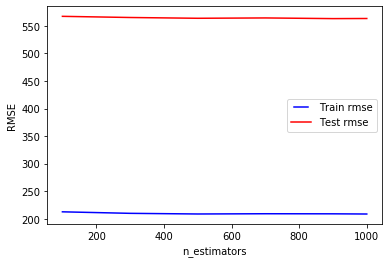

In [112]:
n_estimators = [100,300,500,700,900,1000]
train_results = []
test_results = []
for estimator in n_estimators:
    model = RandomForestRegressor(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(rmse_train)
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(rmse_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train rmse')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test rmse')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.show()

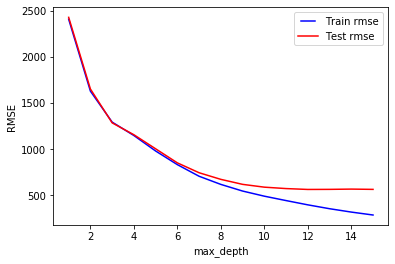

In [107]:
max_depths = [None, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]
train_results = []
test_results = []
for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(rmse_train)
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(rmse_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train rmse')
line2, = plt.plot(max_depths, test_results, 'r', label='Test rmse')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_depth')
plt.show()

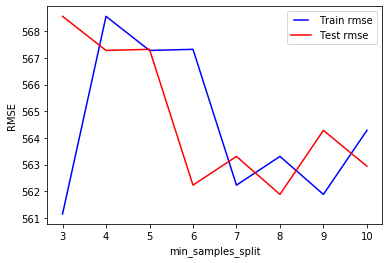

In [108]:
min_samples_splits = [3,4,5,6,7,8,9,10]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = RandomForestRegressor(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(rmse_test)
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(rmse_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train rmse')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test rmse')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_split')
plt.show()

## GridSearchCV

In [ ]:
tuned_parameters = {'n_estimators': [1000,1100,1200,1300],
                    'max_depth': [None, 1, 2, 3], 
                    'min_samples_split': [3,4,5,6]}

forest = RandomForestRegressor()
forest_grid = GridSearchCV(estimator = forest,param_grid=tuned_parameters, cv = 3, verbose = 1, n_jobs = -1)
forest_grid.fit(X, y)

In [ ]:
best_params = forest_grid.best_params_

In [ ]:
best_params

# Submission

In [ ]:
test = pd.read_csv('data.csv/test.csv')

In [ ]:
test['cut']=test['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
test['color']=test['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
test['clarity']=test['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [ ]:
X_pred = test.drop('id',axis=1)

In [ ]:
steps = [
   StandardScaler(),
    Normalizer(),
#      PCA(n_components=5)
]
pipe = make_pipeline(*steps)
X_pred = pipe.fit_transform(X_pred)

In [ ]:
# reg = RandomForestRegressor(max_depth=None,min_samples_split=3,n_estimators=1000)
reg = RandomForestRegressor(max_depth=13,min_samples_split=3,n_estimators=500)
reg.fit(X,y)
pred_sub = reg.predict(X_pred)

In [ ]:
pred_sub

In [ ]:
df_sub = pd.DataFrame(pred_sub, columns=['price'])
df_sub['id'] = test['id']
df_sub = df_sub[['id','price']]

In [ ]:
df_sub.to_csv('submission_MA_D_3.csv',index=False)